# SM and SEM accuracy

ASDASDASDASDASDAS

In [8]:
''' Dependencies '''
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d  # Support for '3d' projections

import seaborn as sns
from scipy import special

In [3]:
''' Utils '''

@np.vectorize
def num_of_all_possible_samples(pop_size, sample_size):
    ''' nCr
    '''
    f = special.factorial # element-wise factorial
    return f(pop_size) // (f(sample_size) * f(pop_size - sample_size))

def max_num_of_samples(pop_size, sample_size):
    return num_of_all_possible_samples(pop_size, sample_size) ** .333

def mean_and_std_from_sample(sample):
    if not isinstance(sample, np.ndarray):
        return (0, 0)
    return (sample.mean(), sample.std(ddof=1))

def sample_size_as_labels(pop_size, sample_size):
    m = max_num_of_samples
    return ['%d (max=%d)' % (s, m(pop_size, s)) for s in sample_size]

#print(num_of_all_possible_samples(20,10))

184756.0


In [4]:
''' Draft '''
'''
# pop size
x = np.linspace(1, 20, 20)

# sample size relative to pop size
y = np.linspace(0, 1, 20)

# pop size x rel sample size grid
X, Y = np.meshgrid(x,y)

Z = num_of_all_possible_samples(X, np.round(Y * X))

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z)

plt.show()
'''

"\n# pop size\nx = np.linspace(1, 20, 20)\n\n# sample size relative to pop size\ny = np.linspace(0, 1, 20)\n\n# pop size x rel sample size grid\nX, Y = np.meshgrid(x,y)\n\nZ = num_of_all_possible_samples(X, np.round(Y * X))\n\nfig = plt.figure(figsize=(5,5))\nax = plt.axes(projection='3d')\n\nax.plot_surface(X, Y, Z)\n\nplt.show()\n"

In [17]:
# Params

POP_SIZE = 50
PLOT_TICKS = 20

POP_GENERATION_SEED = None
SAMPLING_SEED = None

In [18]:
''' Build '''

# Generate the population
np.random.seed(POP_GENERATION_SEED)
population = np.random.sample(POP_SIZE)


# Generate data
x = np.linspace(0, 1, PLOT_TICKS) # rel. sample size
y = np.linspace(0, 1, PLOT_TICKS) # rel. num of samples
X, Y = np.meshgrid(x,y)

sample_size = np.maximum(np.round((x * POP_SIZE)), 1).astype(int)

number_of_samples = Y * max_num_of_samples(POP_SIZE, sample_size)
number_of_samples = np.maximum(np.round(number_of_samples), 1)


# Generate samples for each X,Y and calculate the Sample Mean (SM) and Standard Error of the Mean (SEM)
np.random.seed(SAMPLING_SEED)
sm, sem = (np.ones(shape=number_of_samples.shape) for _ in range(2))

for index, num in np.ndenumerate(number_of_samples):
    sampling_dist = np.array([np.random.choice(population, size=sample_size[index[0]]).mean() for _ in np.arange(num)])
    ddof = 1 if len(sampling_dist) > 1 else 0
    sm[index], sem[index] = sampling_dist.mean(), sampling_dist.std(ddof=ddof)
    
    #print(index, 'sample_size:', sample_size[index[0]], 'sample_qty:', v, 'sm:', sm[idx])

# Calculate the ratios over the population in order to measure the estimates' accuracy
Z1 = sm / population.mean()
Z2 = sem * (sample_size ** .5) / population.std() # Given SEM = pop.std() / sqrt(n)

[ 1  3  5  8 11 13 16 18 21 24 26 29 32 34 37 39 42 45 47 50]


<IPython.core.display.Javascript object>


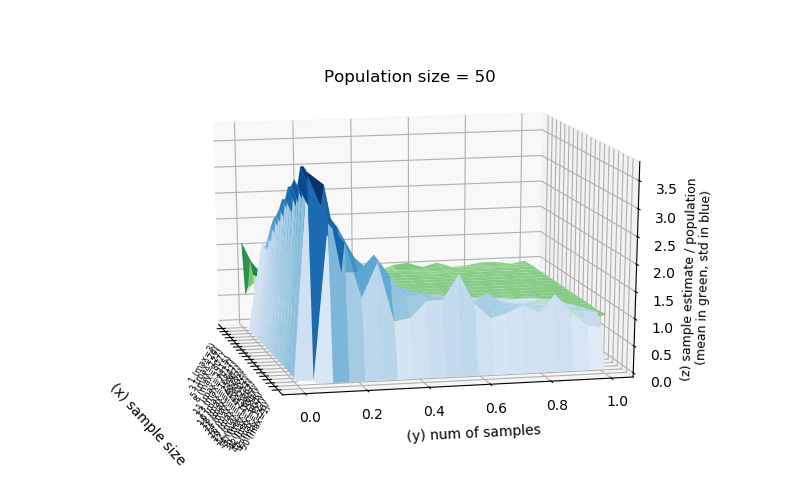

In [24]:
''' Plot '''

fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z1, cmap=cm.Greens)
ax.plot_surface(X, Y, Z2, cmap=cm.Blues)

ax.set_xticks(ticks=x)
x_labels = sample_size_as_labels(POP_SIZE, sample_size)
ax.set_xticklabels(x_labels, rotation='60', fontsize=6)

ax.set_xlabel('(x) sample size', labelpad=36, fontsize=10)
ax.set_ylabel('(y) num of samples', labelpad=10, fontsize=10)
ax.set_zlabel('(z) sample estimate / population \n(mean in green, std in blue)', labelpad=4, fontsize=9)
ax.set_title('Population size = %d' % POP_SIZE)

plt.show()